In [1]:
import pandas as pd # data processing, CSV file I/O 
import numpy as np # linear algebra
import io #reading files for all systems
from sklearn.preprocessing import LabelEncoder # labelling for multiclass variables
import matplotlib.pyplot as plt # some graphs
import seaborn as sns # helping with some visualization techniques 
from sklearn.linear_model import LogisticRegression # logistic regression algorithm
from sklearn.metrics import accuracy_score # calculation for accuracy
%matplotlib inline

In [2]:
df = pd.read_csv("credit_data.csv")
df_test = pd.read_csv("credit_test.csv")

In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
#making copy of original data
original_data = df.copy()

In [5]:
df.columns
df_test.columns


Index(['Loan ID', 'Customer ID', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [6]:
df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [7]:
df.shape

(100514, 19)

<AxesSubplot:>

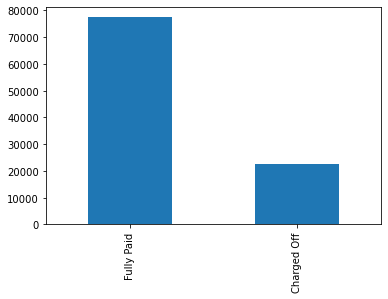

In [8]:
df["Loan Status"].value_counts().plot.bar()

In [9]:
df["Loan Status"].value_counts(normalize=True) 

Fully Paid     0.77361
Charged Off    0.22639
Name: Loan Status, dtype: float64

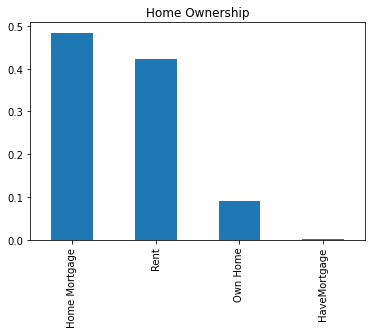

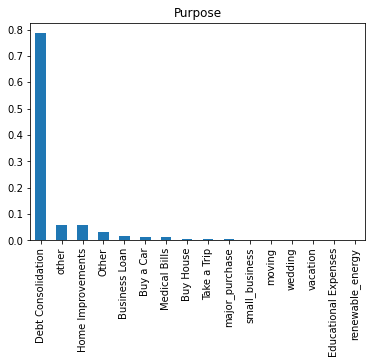

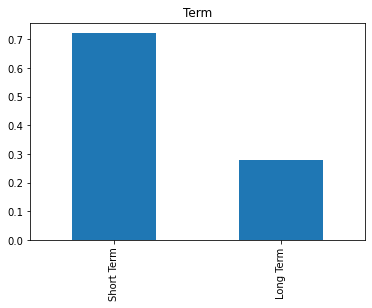

In [10]:
#Plotting independent variable
df["Home Ownership"].value_counts(normalize=True).plot.bar(title="Home Ownership")
plt.show()
df["Purpose"].value_counts(normalize=True).plot.bar(title="Purpose")
plt.show()
df["Term"].value_counts(normalize=True).plot.bar(title="Term")
plt.show()

In [11]:
#Plotting independent variable
df["Home Ownership"].value_counts(normalize=True)


Home Mortgage    0.48410
Rent             0.42194
Own Home         0.09182
HaveMortgage     0.00214
Name: Home Ownership, dtype: float64

In [12]:
df["Purpose"].value_counts(normalize=True)

Debt Consolidation      0.78552
other                   0.06037
Home Improvements       0.05839
Other                   0.03250
Business Loan           0.01569
Buy a Car               0.01265
Medical Bills           0.01127
Buy House               0.00678
Take a Trip             0.00573
major_purchase          0.00352
small_business          0.00283
moving                  0.00150
wedding                 0.00115
vacation                0.00101
Educational Expenses    0.00099
renewable_energy        0.00010
Name: Purpose, dtype: float64

In [13]:
df["Term"].value_counts(normalize=True)

Short Term    0.72208
Long Term     0.27792
Name: Term, dtype: float64

<AxesSubplot:>

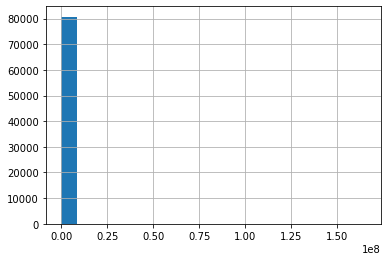

In [14]:
df["Annual Income"].hist(bins=20)


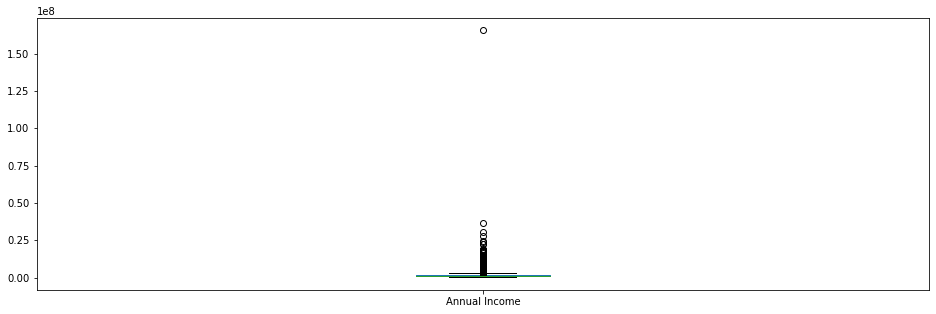

In [15]:
df["Annual Income"].plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:>

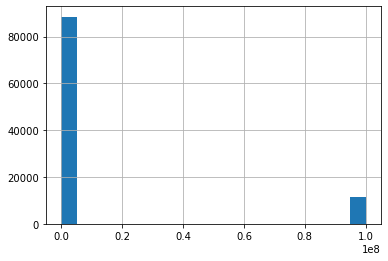

In [16]:
df["Current Loan Amount"].hist(bins=20)

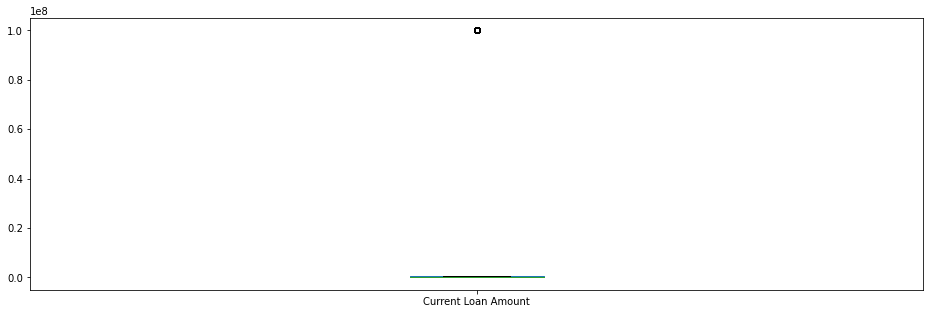

In [17]:
df["Current Loan Amount"].plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:>

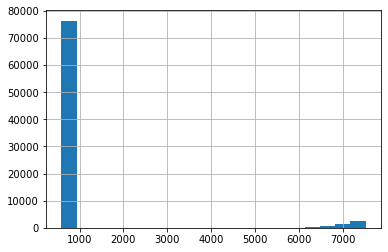

In [18]:
df["Credit Score"].hist(bins=20)

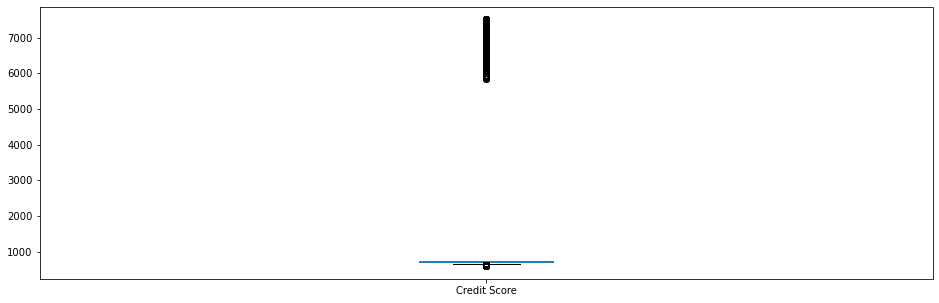

In [19]:
df["Credit Score"].plot.box(figsize=(16,5))
plt.show()

In [20]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [21]:
for credit in df["Credit Score"]:
    if credit > 850:
        print(credit)

7290.0
7120.0
6610.0
7380.0
7370.0
6240.0
7210.0
7500.0
7020.0
7080.0
7140.0
7080.0
7490.0
7360.0
7160.0
6990.0
7410.0
7310.0
7040.0
7120.0
7060.0
7200.0
7450.0
7300.0
7300.0
7430.0
7170.0
7000.0
7280.0
7090.0
6970.0
7460.0
7310.0
6920.0
7350.0
7190.0
7410.0
7040.0
6690.0
7210.0
7170.0
7300.0
6750.0
7290.0
7460.0
7020.0
7210.0
7300.0
7010.0
6530.0
7380.0
7090.0
7270.0
7000.0
7410.0
7420.0
6810.0
7190.0
7070.0
7390.0
7470.0
7490.0
6670.0
7310.0
6710.0
6580.0
7020.0
7420.0
6940.0
6800.0
7110.0
7160.0
7130.0
7110.0
7310.0
6810.0
7310.0
7370.0
5860.0
7210.0
6960.0
7380.0
7000.0
7150.0
6400.0
7200.0
7370.0
7040.0
7290.0
7420.0
7110.0
6830.0
7040.0
6360.0
6650.0
6740.0
7260.0
7480.0
7430.0
7460.0
6980.0
7140.0
7250.0
7320.0
7280.0
7180.0
7090.0
6640.0
7270.0
6780.0
7360.0
7420.0
6090.0
7240.0
6740.0
7390.0
7260.0
7090.0
6920.0
6550.0
6900.0
7190.0
7010.0
6750.0
7170.0
6800.0
6590.0
7200.0
7000.0
6810.0
6940.0
6740.0
7120.0
7300.0
6840.0
7270.0
7310.0
6660.0
7400.0
7210.0
6760.0
7370.0
7190.0

In [22]:
# Maximum credit score is supposed to be 850
# Dividing those credit score by 10 made the credit score more accurate.
for i in range(len(df["Credit Score"])):
    if df["Credit Score"][i] > 850:
        df['Credit Score'][i] = df["Credit Score"][i]/10
print(df["Credit Score"])

<ipython-input-22-7558eafd1f27>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Credit Score'][i] = df["Credit Score"][i]/10


0         709.0
1           NaN
2         741.0
3         721.0
4           NaN
          ...  
100509      NaN
100510      NaN
100511      NaN
100512      NaN
100513      NaN
Name: Credit Score, Length: 100514, dtype: float64


In [23]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,716.293447,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,28.297164,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,703.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,722.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,738.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,751.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


<AxesSubplot:>

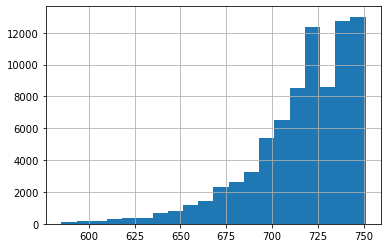

In [24]:
df["Credit Score"].hist(bins=20)

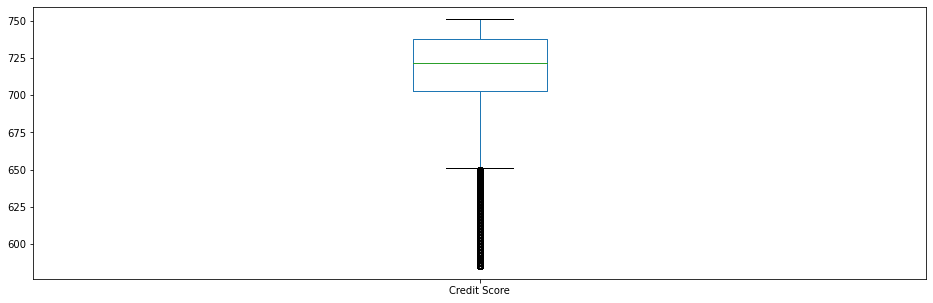

In [25]:
df["Credit Score"].plot.box(figsize=(16,5))
plt.show()

In [26]:
pd.crosstab(df['Annual Income'], df['Loan Status'], margins =True)

Loan Status,Charged Off,Fully Paid,All
Annual Income,,,
76627.0,1,0,1
81092.0,0,1,1
94867.0,0,1,1
97033.0,0,1,1
106533.0,0,1,1
...,...,...,...
28095300.0,0,1,1
30838995.0,1,0,1
36475440.0,0,1,1


# finding relation between target variable and catagorical independent variable

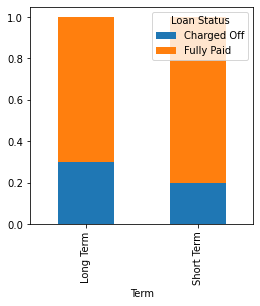

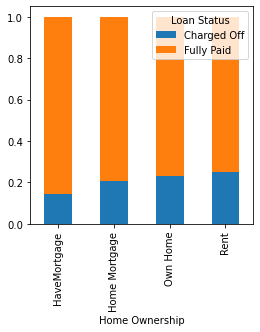

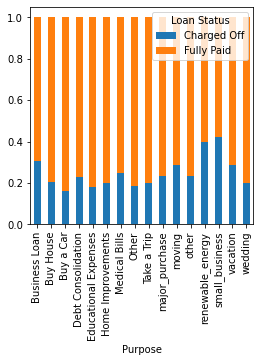

In [27]:
Term=pd.crosstab(df["Term"],df["Loan Status"])
Term.div(Term.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

HomeOwnership=pd.crosstab(df["Home Ownership"],df["Loan Status"])
HomeOwnership.div(HomeOwnership.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

Purpose=pd.crosstab(df["Purpose"],df["Loan Status"])
Purpose.div(Purpose.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()



# finding relation between target variable and numerical independent variable

In [28]:
#Removing "Years" from the column to make it numerical  value instead of categorical 
df["Years in current job"] = df["Years in current job"].str.extract('(\d+)', expand= False)

#Converting data type to float to get the mean value and fill the missng value with it. 
df['Years in current job'] = df['Years in current job'].astype(float, errors = 'raise')


In [29]:
df['Years in current job']

0          8.0
1         10.0
2          8.0
3          3.0
4          5.0
          ... 
100509     NaN
100510     NaN
100511     NaN
100512     NaN
100513     NaN
Name: Years in current job, Length: 100514, dtype: float64

In [30]:
df.columns = df.columns.str.replace(' ', '') #Removing white space so it would be easier to execute code 

In [31]:
df.head()

,LoanID,CustomerID,LoanStatus,CurrentLoanAmount,Term,CreditScore,AnnualIncome,Yearsincurrentjob,HomeOwnership,Purpose,MonthlyDebt,YearsofCreditHistory,Monthssincelastdelinquent,NumberofOpenAccounts,NumberofCreditProblems,CurrentCreditBalance,MaximumOpenCredit,Bankruptcies,TaxLiens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5.0,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


<AxesSubplot:xlabel='LoanStatus'>

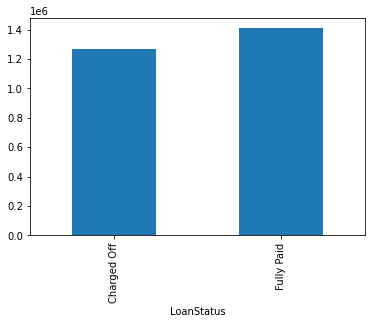

In [32]:
df.groupby("LoanStatus")["AnnualIncome"].mean().plot.bar()

<AxesSubplot:>

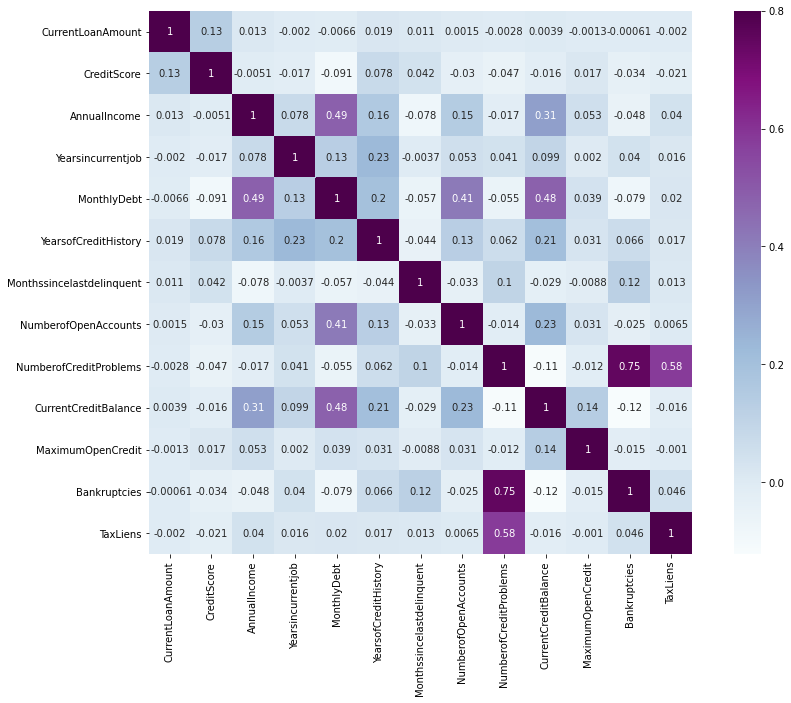

In [33]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

# Pre-processing

In [34]:
df.isnull().sum()

LoanID                         514
CustomerID                     514
LoanStatus                     514
CurrentLoanAmount              514
Term                           514
CreditScore                  19668
AnnualIncome                 19668
Yearsincurrentjob             4736
HomeOwnership                  514
Purpose                        514
MonthlyDebt                    514
YearsofCreditHistory           514
Monthssincelastdelinquent    53655
NumberofOpenAccounts           514
NumberofCreditProblems         514
CurrentCreditBalance           514
MaximumOpenCredit              516
Bankruptcies                   718
TaxLiens                       524
dtype: int64

In [35]:
df = df[df["LoanID"].notnull()]

In [36]:
df.isnull().sum()

LoanID                           0
CustomerID                       0
LoanStatus                       0
CurrentLoanAmount                0
Term                             0
CreditScore                  19154
AnnualIncome                 19154
Yearsincurrentjob             4222
HomeOwnership                    0
Purpose                          0
MonthlyDebt                      0
YearsofCreditHistory             0
Monthssincelastdelinquent    53141
NumberofOpenAccounts             0
NumberofCreditProblems           0
CurrentCreditBalance             0
MaximumOpenCredit                2
Bankruptcies                   204
TaxLiens                        10
dtype: int64

In [37]:
df = df[df["Bankruptcies"].notnull()]
df = df[df["TaxLiens"].notnull()]
df = df[df["MaximumOpenCredit"].notnull()]

In [38]:
#Using mean to fill the numerical variable datatrain
df.CreditScore = df.CreditScore.fillna(df.CreditScore.mean())
df.AnnualIncome = df.AnnualIncome.fillna(df.AnnualIncome.mean())
df.Monthssincelastdelinquent = df.Monthssincelastdelinquent.fillna(df.Monthssincelastdelinquent.mean())
df.Yearsincurrentjob = df.Yearsincurrentjob.fillna(df.Yearsincurrentjob.mean())

In [39]:
df.isnull().sum()

LoanID                       0
CustomerID                   0
LoanStatus                   0
CurrentLoanAmount            0
Term                         0
CreditScore                  0
AnnualIncome                 0
Yearsincurrentjob            0
HomeOwnership                0
Purpose                      0
MonthlyDebt                  0
YearsofCreditHistory         0
Monthssincelastdelinquent    0
NumberofOpenAccounts         0
NumberofCreditProblems       0
CurrentCreditBalance         0
MaximumOpenCredit            0
Bankruptcies                 0
TaxLiens                     0
dtype: int64

In [40]:
#normalizing Annual Income
df["AnnualIncome_log"] = np.log(df["AnnualIncome"])
#normalizing current loan amount
df["CurrentLoanAmount_log"] = np.log(df["CurrentLoanAmount"])

<AxesSubplot:>

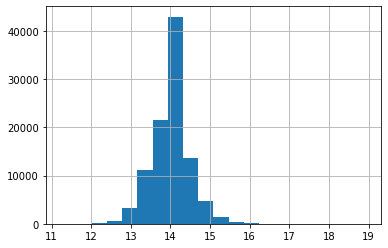

In [41]:
df["AnnualIncome_log"].hist(bins=20)

<AxesSubplot:>

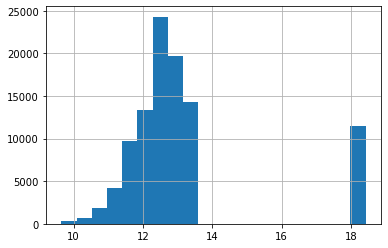

In [42]:
df["CurrentLoanAmount_log"].hist(bins=20)

# Modeling 

In [43]:
df.head()

,LoanID,CustomerID,LoanStatus,CurrentLoanAmount,Term,CreditScore,AnnualIncome,Yearsincurrentjob,HomeOwnership,Purpose,...,YearsofCreditHistory,Monthssincelastdelinquent,NumberofOpenAccounts,NumberofCreditProblems,CurrentCreditBalance,MaximumOpenCredit,Bankruptcies,TaxLiens,AnnualIncome_log,CurrentLoanAmount_log
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.000000,1.167493e+06,8.0,Home Mortgage,Home Improvements,...,17.2,34.988597,6.0,1.0,228190.0,416746.0,1.0,0.0,13.970369,13.006755
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,716.278671,1.378339e+06,10.0,Home Mortgage,Debt Consolidation,...,21.1,8.000000,35.0,0.0,229976.0,850784.0,0.0,0.0,14.136390,12.477351
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.000000,2.231892e+06,8.0,Own Home,Debt Consolidation,...,14.9,29.000000,18.0,1.0,297996.0,750090.0,0.0,0.0,14.618360,18.420681
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.000000,8.069490e+05,3.0,Own Home,Debt Consolidation,...,12.0,34.988597,9.0,0.0,256329.0,386958.0,0.0,0.0,13.601016,12.758998
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,716.278671,1.378339e+06,5.0,Rent,Debt Consolidation,...,6.1,34.988597,15.0,0.0,253460.0,427174.0,0.0,0.0,14.136390,12.079488


In [44]:
#dropping LoanId and CustomerId since it does not effect loan Status
df = df.drop("LoanID",axis =1)
df = df.drop("CustomerID",axis =1)

In [45]:
df.head()

,LoanStatus,CurrentLoanAmount,Term,CreditScore,AnnualIncome,Yearsincurrentjob,HomeOwnership,Purpose,MonthlyDebt,YearsofCreditHistory,Monthssincelastdelinquent,NumberofOpenAccounts,NumberofCreditProblems,CurrentCreditBalance,MaximumOpenCredit,Bankruptcies,TaxLiens,AnnualIncome_log,CurrentLoanAmount_log
0,Fully Paid,445412.0,Short Term,709.000000,1.167493e+06,8.0,Home Mortgage,Home Improvements,5214.74,17.2,34.988597,6.0,1.0,228190.0,416746.0,1.0,0.0,13.970369,13.006755
1,Fully Paid,262328.0,Short Term,716.278671,1.378339e+06,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,8.000000,35.0,0.0,229976.0,850784.0,0.0,0.0,14.136390,12.477351
2,Fully Paid,99999999.0,Short Term,741.000000,2.231892e+06,8.0,Own Home,Debt Consolidation,29200.53,14.9,29.000000,18.0,1.0,297996.0,750090.0,0.0,0.0,14.618360,18.420681
3,Fully Paid,347666.0,Long Term,721.000000,8.069490e+05,3.0,Own Home,Debt Consolidation,8741.90,12.0,34.988597,9.0,0.0,256329.0,386958.0,0.0,0.0,13.601016,12.758998
4,Fully Paid,176220.0,Short Term,716.278671,1.378339e+06,5.0,Rent,Debt Consolidation,20639.70,6.1,34.988597,15.0,0.0,253460.0,427174.0,0.0,0.0,14.136390,12.079488


In [46]:
df["LoanStatus"].replace("Charged Off", 0,inplace=True)
df["LoanStatus"].replace("Fully Paid", 1,inplace=True)

df['LoanStatus'] = df['LoanStatus'].astype(float, errors = 'raise')

In [47]:
#droping target variable from training database for scikit-learn
X = df.drop("LoanStatus",1)
y = df.LoanStatus

In [48]:
X

,CurrentLoanAmount,Term,CreditScore,AnnualIncome,Yearsincurrentjob,HomeOwnership,Purpose,MonthlyDebt,YearsofCreditHistory,Monthssincelastdelinquent,NumberofOpenAccounts,NumberofCreditProblems,CurrentCreditBalance,MaximumOpenCredit,Bankruptcies,TaxLiens,AnnualIncome_log,CurrentLoanAmount_log
0,445412.0,Short Term,709.000000,1.167493e+06,8.000000,Home Mortgage,Home Improvements,5214.74,17.2,34.988597,6.0,1.0,228190.0,416746.0,1.0,0.0,13.970369,13.006755
1,262328.0,Short Term,716.278671,1.378339e+06,10.000000,Home Mortgage,Debt Consolidation,33295.98,21.1,8.000000,35.0,0.0,229976.0,850784.0,0.0,0.0,14.136390,12.477351
2,99999999.0,Short Term,741.000000,2.231892e+06,8.000000,Own Home,Debt Consolidation,29200.53,14.9,29.000000,18.0,1.0,297996.0,750090.0,0.0,0.0,14.618360,18.420681
3,347666.0,Long Term,721.000000,8.069490e+05,3.000000,Own Home,Debt Consolidation,8741.90,12.0,34.988597,9.0,0.0,256329.0,386958.0,0.0,0.0,13.601016,12.758998
4,176220.0,Short Term,716.278671,1.378339e+06,5.000000,Rent,Debt Consolidation,20639.70,6.1,34.988597,15.0,0.0,253460.0,427174.0,0.0,0.0,14.136390,12.079488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,147070.0,Short Term,725.000000,4.754370e+05,7.000000,Own Home,other,2202.86,22.3,34.988597,5.0,0.0,47766.0,658548.0,0.0,0.0,13.071990,11.898664
99996,99999999.0,Short Term,732.000000,1.289416e+06,1.000000,Rent,Debt Consolidation,13109.05,9.4,21.000000,22.0,0.0,153045.0,509234.0,0.0,0.0,14.069700,18.420681
99997,103136.0,Short Term,742.000000,1.150545e+06,6.000000,Rent,Debt Consolidation,7315.57,18.8,18.000000,12.0,1.0,109554.0,537548.0,1.0,0.0,13.955746,11.543804
99998,530332.0,Short Term,746.000000,1.717524e+06,9.000000,Rent,Debt Consolidation,9890.07,15.0,34.988597,8.0,0.0,404225.0,738254.0,0.0,0.0,14.356394,13.181259


In [49]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
99995    1.0
99996    1.0
99997    1.0
99998    1.0
99999    1.0
Name: LoanStatus, Length: 99794, dtype: float64

In [50]:
#making dummy variable for catagorical variable so the catagorical variable can be turned into series of 0 and 1
X = pd.get_dummies(X)
df=pd.get_dummies(df)

In [51]:
X

,CurrentLoanAmount,CreditScore,AnnualIncome,Yearsincurrentjob,MonthlyDebt,YearsofCreditHistory,Monthssincelastdelinquent,NumberofOpenAccounts,NumberofCreditProblems,CurrentCreditBalance,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,445412.0,709.000000,1.167493e+06,8.000000,5214.74,17.2,34.988597,6.0,1.0,228190.0,...,0,0,0,0,0,0,0,0,0,0
1,262328.0,716.278671,1.378339e+06,10.000000,33295.98,21.1,8.000000,35.0,0.0,229976.0,...,0,0,0,0,0,0,0,0,0,0
2,99999999.0,741.000000,2.231892e+06,8.000000,29200.53,14.9,29.000000,18.0,1.0,297996.0,...,0,0,0,0,0,0,0,0,0,0
3,347666.0,721.000000,8.069490e+05,3.000000,8741.90,12.0,34.988597,9.0,0.0,256329.0,...,0,0,0,0,0,0,0,0,0,0
4,176220.0,716.278671,1.378339e+06,5.000000,20639.70,6.1,34.988597,15.0,0.0,253460.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,147070.0,725.000000,4.754370e+05,7.000000,2202.86,22.3,34.988597,5.0,0.0,47766.0,...,0,0,0,0,0,1,0,0,0,0
99996,99999999.0,732.000000,1.289416e+06,1.000000,13109.05,9.4,21.000000,22.0,0.0,153045.0,...,0,0,0,0,0,0,0,0,0,0
99997,103136.0,742.000000,1.150545e+06,6.000000,7315.57,18.8,18.000000,12.0,1.0,109554.0,...,0,0,0,0,0,0,0,0,0,0
99998,530332.0,746.000000,1.717524e+06,9.000000,9890.07,15.0,34.988597,8.0,0.0,404225.0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
99995    1.0
99996    1.0
99997    1.0
99998    1.0
99999    1.0
Name: LoanStatus, Length: 99794, dtype: float64

In [53]:
#Dividing our train data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [67]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [68]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
DTClassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [70]:
y_pred= DTClassifier.predict(x_test)
y_pred

array([1., 1., 0., ..., 1., 1., 1.])

In [71]:
from sklearn import metrics
print("The acccuracy of decision tree is: ", metrics.accuracy_score(y_pred,y_test))

The acccuracy of decision tree is:  0.6645846554661144


In [72]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(x_train, y_train)

GaussianNB()

In [73]:
y_pred = NBClassifier.predict(x_test)

In [74]:
y_pred

array([0., 1., 0., ..., 1., 0., 1.])

In [75]:
print("The accuracyt of Naive Bayes is:", metrics.accuracy_score(y_pred,y_test))

The accuracyt of Naive Bayes is: 0.3706536624469755
